# Example For Numerical and Trotter Simulation

In this notebook we demonstrate a use case of the Numerical and Trotter hamiltonian simulations from the module ```numerical_trotter_hamiltonian_simulation.py```

This module is designed to simulate the evolution of a specific type of local Hamiltonian. Specifically, local Hamiltonians where each such terms is a 'string' of Pauli operators. Consider, a Hamiltonian on $n$ qubits,
$$
H = \sum_j \alpha_j (\sigma_1^\mu \otimes \ldots \otimes \sigma_n^\nu)_j
$$

The ```numerical_trotter_hamiltonian_simulation.py``` can simulate these classically (numerically) and using the Trotterisation procedure.

# Hamiltonian Simulation

Hamiltonian simulation is concerned with the approximation of the exponentiation of the Hamiltonian for a given system, $e^{-iHt}$. For small systems, a numerical calculation may be sufficient and straightforward, however the use case for approximation this exponential, is it application to some initial state vector, $\ket{\psi(0)}$. Quantum computing hopes to ease this process somewhat by giving efficient approximations to the evolved state vector. 

To summarise the intetion of this code:
1. approximate $e^{-iHt}$
2. use the approximation to evolve an initial state $\ket{\psi(0)} \mapsto \ket{\psi(t)} = e^{-iHt}\ket{\psi(0)}$
3. compare the output of the classical and quantum simulations

# Install

Let us install the necessary modules

In [1]:
import numerical_trotter_hamiltonian_simulation as hs # for the simulation

import numpy as np # for generating initial states

from qiskit import QuantumCircuit # for shwoing quantum circuits

from sympy import Matrix # for outputting nice matrices and vectors

# System of Interest

To keep things simple, we consider a low-particle Ising model with external fields. The Ising model is defined as,
$$
H = J\sum_{\langle i,j \rangle} Z_iZ_j
$$
assuming nearest neighbor interactions and a uniform coefficient $J\in \mathbb{R}$. With external fields, the Hamiltonian simply becomes,
$$
H = J\sum_{\langle i,j \rangle} Z_iZ_j + \sum_i f_iX_i + h_iY_i + f_iZ_i
$$

We consider two cases:
1. Ferromagnetic regime with no external fields
2. Antiferromagnetic regime with simple external fields

# Ferromagnetic Case

Consider 4 particles interacting via the Ising model just defined. We know the Ising model will tend to align states in the ferromagnetic regime.

A good test to perfom to see how well the trotterisation might go is to consider the all up spin state.

For the ```numerical_trotter_hamiltonian_simulation``` we need to define the number of qubits and the pauli hash map

*Extract* statevector at time $t=2\pi$

In [2]:
ferro_ising_qubit_count = 4
ferro_ising_map = {'zzii':-1, 'zizi':-1, 'iziz':-1, 'iizz':-1}
evolution_time = 2*np.pi

Initialise the numerical and trotter examples.

In [3]:
numerical_ferro_ising = hs.NumericalHamiltonianSimulation(qubit_count=ferro_ising_qubit_count, pauli_hash_map=ferro_ising_map)
trotter_ferro_ising = hs.TrotterHamiltonianSimulation(qubit_count=ferro_ising_qubit_count, pauli_hash_map=ferro_ising_map)

Extract the statevector at the defined time. To visualise, ```from sympy import Matrix```

Define an initial state as $\ket{\uparrow\uparrow\uparrow\uparrow} = \ket{0000} = (1000 0000 0000 0000)^T$

In [4]:
from sympy import Matrix

numerical_ferro_ising_sv = numerical_ferro_ising.getStatevector(initial_state=np.array([1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]), execution_time=evolution_time)
trotter_ferro_ising_sv = trotter_ferro_ising.getStatevector(initial_state=np.array([1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]), execution_time=evolution_time)

In [5]:
Matrix(numerical_ferro_ising_sv)

Matrix([
[1.0 - 9.79717439317883e-16*I],
[                           0],
[                           0],
[                           0],
[                           0],
[                           0],
[                           0],
[                           0],
[                           0],
[                           0],
[                           0],
[                           0],
[                           0],
[                           0],
[                           0],
[                           0]])

In [6]:
Matrix(trotter_ferro_ising_sv)

Matrix([
[1.0 + 1.38777878078145e-15*I],
[                           0],
[                           0],
[                           0],
[                           0],
[                           0],
[                           0],
[                           0],
[                           0],
[                           0],
[                           0],
[                           0],
[                           0],
[                           0],
[                           0],
[                           0]])

We can also draw the circuit for the Hamiltonian. Here we draw what one step looks like.

In [7]:
qc=QuantumCircuit(4)
trotter_ferro_ising.getQuantumCircuit(quantum_circuit=qc, trotter_step_scaling_func='1', execution_time=1)
qc.draw()

q_0: ──■──────────────■────■───────────────────■───────────────────────────
     ┌─┴─┐┌────────┐┌─┴─┐  │                   │                           
q_1: ┤ X ├┤ Rz(-2) ├┤ X ├──┼────■──────────────┼────■──────────────────────
     └───┘└────────┘└───┘┌─┴─┐  │  ┌────────┐┌─┴─┐  │                      
q_2: ────────────────────┤ X ├──┼──┤ Rz(-2) ├┤ X ├──┼────■──────────────■──
                         └───┘┌─┴─┐├────────┤└───┘┌─┴─┐┌─┴─┐┌────────┐┌─┴─┐
q_3: ─────────────────────────┤ X ├┤ Rz(-2) ├─────┤ X ├┤ X ├┤ Rz(-2) ├┤ X ├
                              └───┘└────────┘     └───┘└───┘└────────┘└───┘

We can also perform a measure between the Trotter statevectors and the classical ones. To do this we can call the ```NTFidelityTest``` function.

The fidelity test compares the output statevectors over some specified range. The equation used is,
$$
F(N, T) = |\bra{\psi_N(t)}\ket{\psi_T(t)}|^2
$$

In [8]:
trotter_ferro_ising.NTFidelityTest(file_name='doc_test', initial_state=np.array([1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]))

>>> initialising the numerical statevector...
>>> fetching fidelity data...
>>> fidelity data found!
>>> fetching final statevectors and generating data...
Data saved to doc_test_NT_fidelity.csv.
Metadata saved to doc_test_metadata.txt.


To plot this data we use ```pandas``` and ```matplotlib```

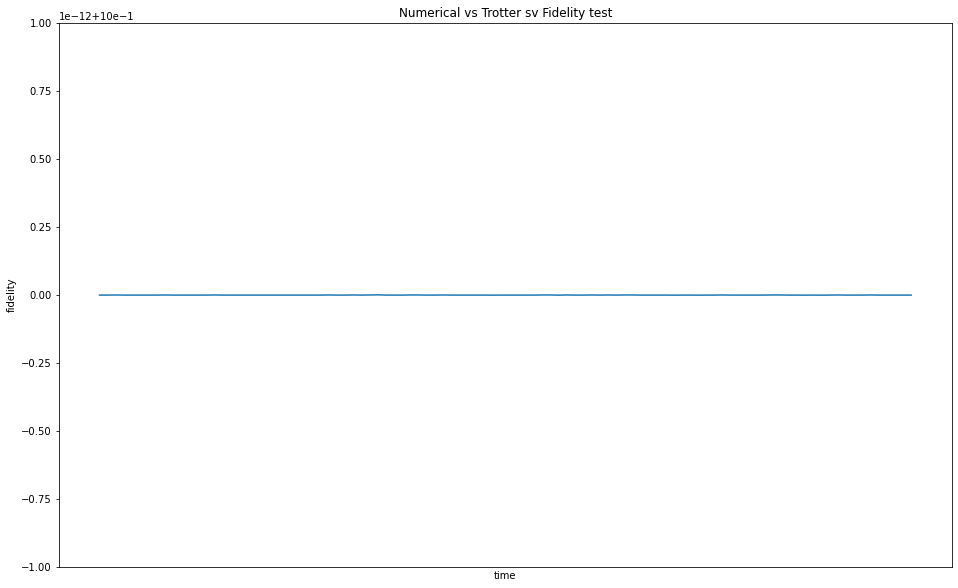

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

headers = ['time','fidelity']

df = pd.read_csv('doc_test_NT_fidelity.csv', names=headers)

x = df['time']
y = df['fidelity']
x = [float(item) for item in x[1:]]
y = [float(item) for item in y[1:]]
plt.figure(figsize=(16, 10))
plt.plot(x,y)
plt.xlabel('time') 
# plt.yticks([0, 0.5, 1 ,1.5])
plt.xticks([])
plt.ylabel('fidelity') 
plt.title('Numerical vs Trotter sv Fidelity test')
plt.show()


As we can see, the fidelity is very close! 

Let's consider an example where we reduce the number of Trotter steps to see what happens.

>>> initialising the numerical statevector...
>>> fetching fidelity data...
>>> fidelity data found!
>>> fetching final statevectors and generating data...
Data saved to doc_test_two_NT_fidelity.csv.
Metadata saved to doc_test_two_metadata.txt.


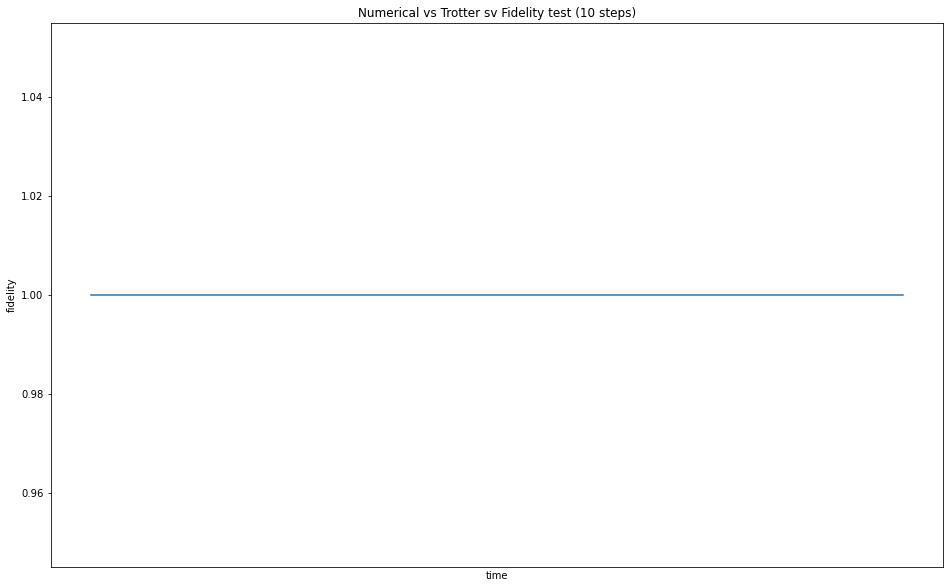

In [10]:
trotter_ferro_ising.NTFidelityTest(file_name='doc_test_two', initial_state=np.array([1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]), trotter_step_scaling_func='10')

headers = ['time','fidelity']

df = pd.read_csv('doc_test_two_NT_fidelity.csv', names=headers)

x = df['time']
y = df['fidelity']
x = [float(item) for item in x[1:]]
y = [float(item) for item in y[1:]]
plt.figure(figsize=(16, 10))
plt.plot(x,y)
plt.xlabel('time') 
# plt.yticks([0, 0.5, 1 ,1.5])
plt.xticks([])
plt.ylabel('fidelity') 
plt.title('Numerical vs Trotter sv Fidelity test (10 steps)')
plt.show()

Due to the input Hamiltonian being diagonal, it is inherintley a classical system and so will simulate nicely. We can see that even at low steps the statevector fidelity is close and the energy evolution remains constant. For our next example this wont be so straightforward.

>>> fetching energy data...
>>> energy data found!
>>> fetching final energy and generating data...
Data saved to trotter_doc_test_three_energy.csv.
Metadata saved to trotter_doc_test_three_metadata.txt.


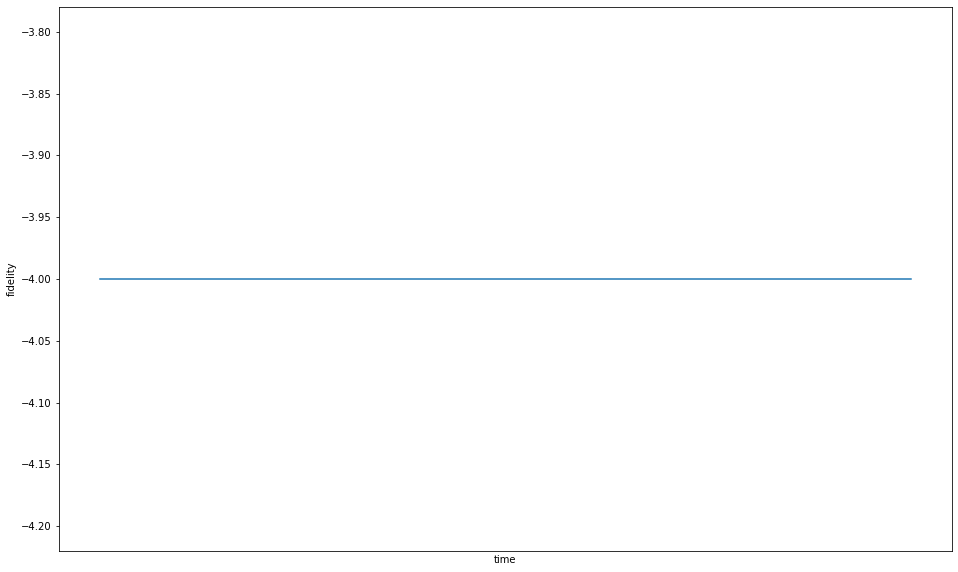

In [17]:
trotter_ferro_ising.energyEvolutionData(file_name='doc_test_three', initial_state=np.array([1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]), trotter_step_scaling_func='10')

headers = ['time','energy']

df = pd.read_csv('trotter_doc_test_three_energy.csv', names=headers)

x = df['time']
y = df['energy']
x = [float(item) for item in x[1:]]
y = [float(item) for item in y[1:]]
plt.figure(figsize=(16, 10))
plt.plot(x,y)
plt.xlabel('time') 
# plt.yticks([0, 0.5, 1 ,1.5])
plt.xticks([])
plt.ylabel('fidelity') 
plt.show()

# Antiferromagneitc Case

Turning our attention now to the antiferromagnetic case we can become slightly more involved.

Let us consider a system of $5$ qubits acting on a complete-$5$ graph. Let us also arbitrarily define some external fields.

The hash_map is simple to define and so we initialise our system.

For this example we choose a random initial state to see how both methods compare.

Outputs:
1. energy evolution data
2. fidelity evolution data

In [11]:
antiferro_ising_qubit_count=5
antiferro_ising_map = {'ZZIII': 2, 'ZIIIZ': 2, 'IZZII': 2, 'IIZZI': 2, 'IIIZZ': 2, 'ZIZII': 2, 'ZIIZI': 2, 'IZIZI': 2, 'IZIIZ': 2, 'XIIII': -1, 'IYIII': -0.2, 'IIXII': -1.2, 'IIIZI': -3, 'IIIIX': 1.4}
antiferro_init_state = np.array([1,0,0,0,0,0,0,0,0,0,1j,0,0,0,0,0,0,0,1+3j,0,0,0,-1j,0,0,0,0,0,0,0,0,0])
evolution_time = 10

In [12]:
numerical_antiferro_ising = hs.NumericalHamiltonianSimulation(qubit_count=antiferro_ising_qubit_count, pauli_hash_map=antiferro_ising_map)
trotter_antiferro_ising = hs.TrotterHamiltonianSimulation(qubit_count=antiferro_ising_qubit_count, pauli_hash_map=antiferro_ising_map)

For this example let us consider the energy evolution of the system. This Hamiltonian is not as nice as the previous, nor is the initial state. This can lead to the simulation breaking down at larger times.

>>> fetching energy data...
>>> energy data found!
>>> fetching the final state and generating data!
Data saved to numerical_antiferro_demo_energy.csv.
Metadata saved to numerical_antiferro_demo_metadata.txt.


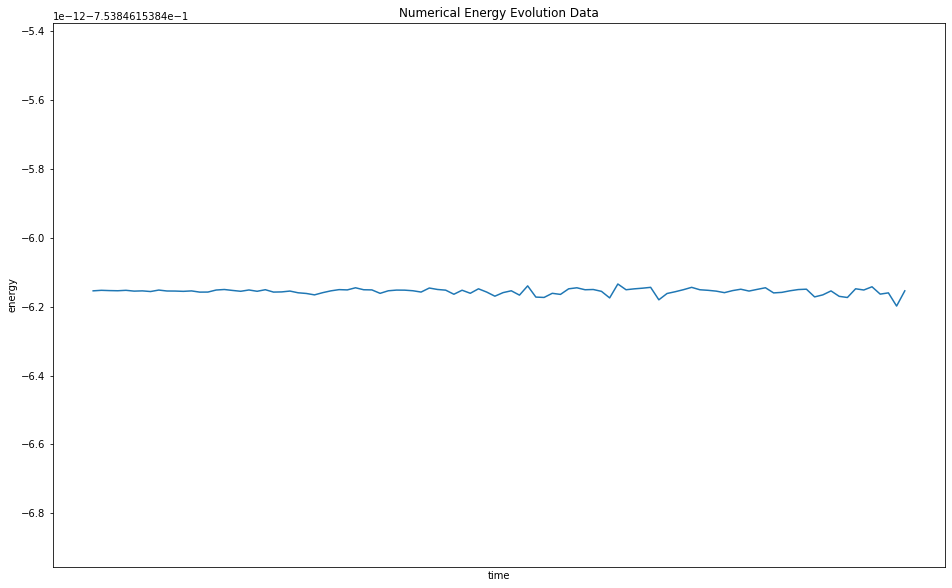

In [18]:
numerical_antiferro_ising.energyEvolutionData(file_name='antiferro_demo', initial_state=antiferro_init_state)

headers = ['time','energy']

df = pd.read_csv('numerical_antiferro_demo_energy.csv', names=headers)

x = df['time']
y = df['energy']
x = [float(item) for item in x[1:]]
y = [float(item) for item in y[1:]]
plt.figure(figsize=(16, 10))
plt.plot(x,y)
plt.xlabel('time') 
# plt.yticks([0, 0.5, 1 ,1.5])
plt.xticks([])
plt.ylabel('energy') 
plt.title('Numerical Energy Evolution Data')
plt.show()

>>> fetching energy data...
>>> energy data found!
>>> fetching final energy and generating data...
Data saved to trotter_antiferro_demo_energy.csv.
Metadata saved to trotter_antiferro_demo_metadata.txt.


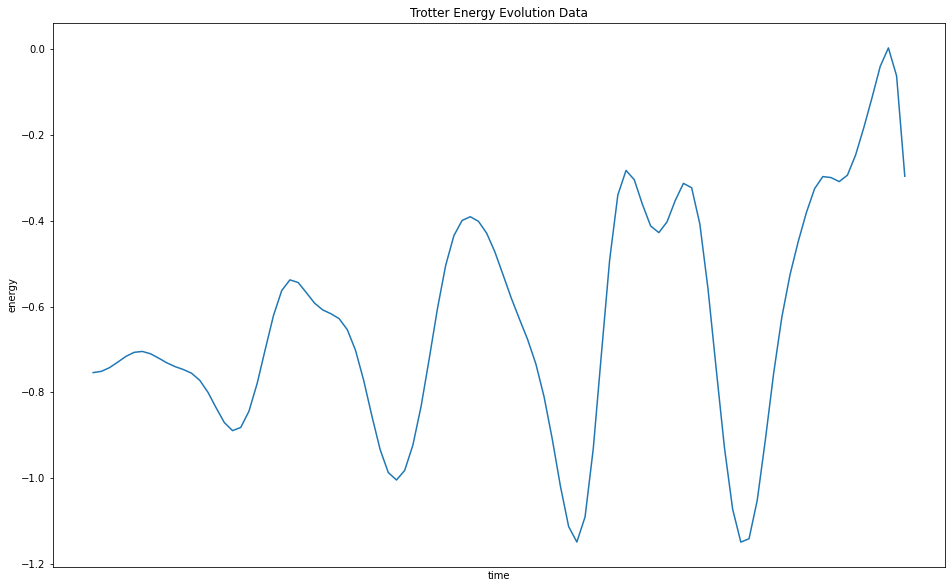

In [19]:
trotter_antiferro_ising.energyEvolutionData(file_name='antiferro_demo', initial_state=antiferro_init_state)

headers = ['time','energy']

df = pd.read_csv('trotter_antiferro_demo_energy.csv', names=headers)

x = df['time']
y = df['energy']
x = [float(item) for item in x[1:]]
y = [float(item) for item in y[1:]]
plt.figure(figsize=(16, 10))
plt.plot(x,y)
plt.xlabel('time') 
# plt.yticks([0, 0.5, 1 ,1.5])
plt.xticks([])
plt.ylabel('energy') 
plt.title('Trotter Energy Evolution Data')
plt.show()

Let's try increase the number of Trotter steps to see if our energy evolution can get any better. Remeber from above that we do not need to re-initialise the example, rather, we can use the ```trotter_step_scaling_func``` to specify a number of steps. We choose 100.

>>> fetching energy data...
>>> energy data found!
>>> fetching final energy and generating data...
Data saved to trotter_antiferro_demo_two_energy.csv.
Metadata saved to trotter_antiferro_demo_two_metadata.txt.


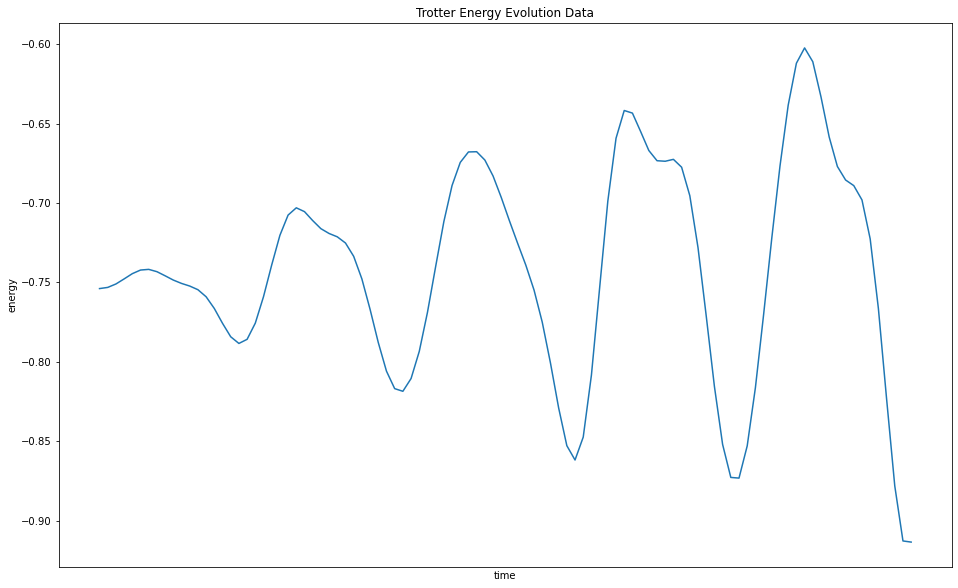

In [20]:
trotter_antiferro_ising.energyEvolutionData(file_name='antiferro_demo_two', initial_state=antiferro_init_state,trotter_step_scaling_func='100')

headers = ['time','energy']

df = pd.read_csv('trotter_antiferro_demo_two_energy.csv', names=headers)

x = df['time']
y = df['energy']
x = [float(item) for item in x[1:]]
y = [float(item) for item in y[1:]]
plt.figure(figsize=(16, 10))
plt.plot(x,y)
plt.xlabel('time') 
# plt.yticks([0, 0.5, 1 ,1.5])
plt.xticks([])
plt.ylabel('energy') 
plt.title('Trotter Energy Evolution Data')
plt.show()